**Name:** Akash A

**Register Number:** 212221230003

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [2]:
dataset_train = pd.read_csv('trainset.csv')

In [3]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
type(train_set)

numpy.ndarray

In [7]:
train_set.shape

(1259, 1)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [9]:
training_set_scaled.shape

(1259, 1)

In [10]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [11]:
X_train.shape

(1199, 60)

In [12]:
length = 60
n_features = 1

In [13]:
model = Sequential()

In [14]:
model.add(layers.SimpleRNN(42, input_shape = (60, 1)))
model.add(layers.Dense(1))

In [15]:
model.compile(optimizer = "adam", loss = "mse")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 42)                1848      
                                                                 
 dense (Dense)               (None, 1)                 43        
                                                                 
Total params: 1891 (7.39 KB)
Trainable params: 1891 (7.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(X_train1,y_train,epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 4s 40ms/step - loss: 0.0141
Epoch 2/20
38/38 [==============================] - 2s 46ms/step - loss: 9.1234e-04
Epoch 3/20
38/38 [==============================] - 2s 44ms/step - loss: 7.6571e-04
Epoch 4/20
38/38 [==============================] - 1s 31ms/step - loss: 6.3030e-04
Epoch 5/20
38/38 [==============================] - 2s 42ms/step - loss: 6.4927e-04
Epoch 6/20
38/38 [==============================] - 2s 64ms/step - loss: 5.5468e-04
Epoch 7/20
38/38 [==============================] - 3s 72ms/step - loss: 5.5474e-04
Epoch 8/20
38/38 [==============================] - 3s 72ms/step - loss: 5.4531e-04
Epoch 9/20
38/38 [==============================] - 3s 72ms/step - loss: 5.3734e-04
Epoch 10/20
38/38 [==============================] - 3s 80ms/step - loss: 4.7764e-04
Epoch 11/20
38/38 [==============================] - 1s 34ms/step - loss: 4.4878e-04
Epoch 12/20
38/38 [==============================] - 1s 32ms/step - loss: 4.65

In [18]:
dataset_test = pd.read_csv('testset.csv')

In [19]:
test_set = dataset_test.iloc[:,1:2].values

In [20]:
test_set.shape

(125, 1)

In [21]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [22]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
test_set = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [23]:
X_test.shape

(1324, 60, 1)

In [24]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 5ms/step


Name: Akash A  Register Number: 212221230003


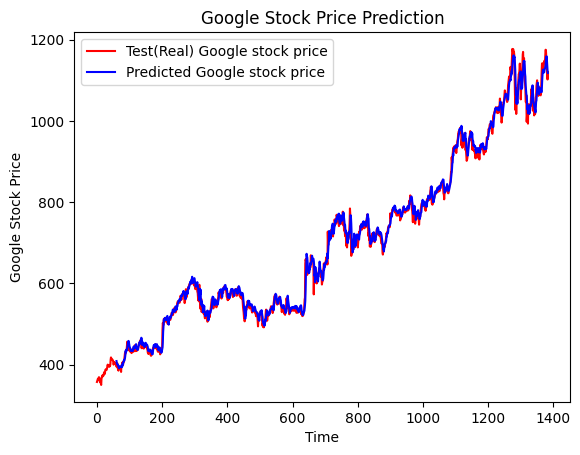

In [25]:
print("Name: Akash A  Register Number: 212221230003")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, predicted_stock_price)

542974.8567070375